In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/processed/silver.parquet")
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
df.shape


(7043, 20)

In [4]:
df.isna().sum().sort_values(ascending=False).head(10)


gender              0
SeniorCitizen       0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
dtype: int64

In [5]:
df["Churn"].value_counts(normalize=True)


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [6]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df.groupby("Churn")[numeric_cols].mean().T


Churn,0,1
SeniorCitizen,0.128721,0.254682
tenure,37.569965,17.979133
MonthlyCharges,61.265124,74.441332
TotalCharges,2552.882494,1531.796094
Churn,0.000000,1.000000


<Figure size 640x480 with 0 Axes>

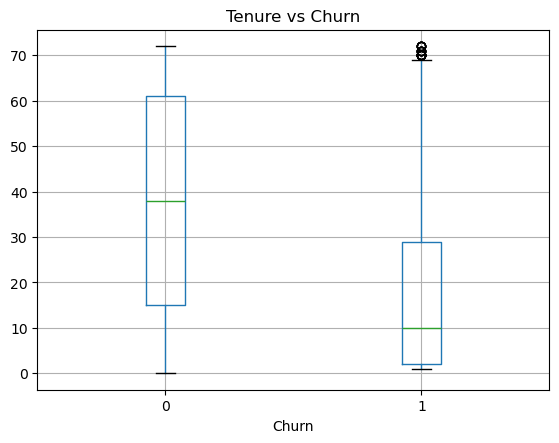

In [7]:
plt.figure()
df.boxplot(column="tenure", by="Churn")
plt.title("Tenure vs Churn")
plt.suptitle("")
plt.show()


<Figure size 640x480 with 0 Axes>

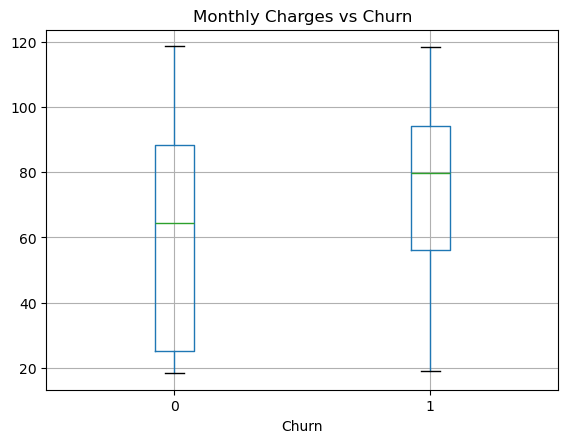

In [8]:
plt.figure()
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges vs Churn")
plt.suptitle("")
plt.show()

In [9]:
categorical_cols = [
    "Contract",
    "PaymentMethod",
    "InternetService"
]

for col in categorical_cols:
    print(f"\n{col}")
    print(pd.crosstab(df[col], df["Churn"], normalize="index"))



Contract
Churn                  0         1
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319

PaymentMethod
Churn                             0         1
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067

InternetService
Churn                   0         1
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


### Key Observations
- Customers with month-to-month contracts churn significantly more often
- Lower tenure is strongly associated with churn
- Customers with higher monthly charges show higher churn risk
- Long-term contracts (1–2 years) are associated with low churn
